# Aticha Amie Prasongsukarn

## Research question/interests

**What are the average healthcare costs and income for different age groups?**
For this question, I plan to calculate the average healthcare cost and income for each age group and produce a graph where the x-axis is the age group and the y-axis is the amount. The graph will be plotted as a bar chart with 2 bars for each age group side by side, 1 for healthcare cost and the other for income.

**Does the age group correlate with healthcare costs in a set of data collected from several regions in the US?**
I plan to create a scatter plot for this question and see whether the data will create a correlated outcome that will be clear enough to create a line/curve of best fit or not. If the plot produced shows a weak correlation, I could add error bars and find the outlier for the dataset and drop those outliers. Thus, refining the dataset further and creating a stronger dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
medcost = pd.read_csv("../data/raw/medical_expense.csv")
medcost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
income = pd.read_csv("../data/raw/adult_income.csv")
income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Research Question 1: What are the average healthcare costs and income for different age groups?

* remove unneccessary columns from each dataset

In [4]:
med_clean1 = medcost.drop(['sex', 'bmi','children', 'smoker', 'region'], axis = 1)
med_clean1

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


In [5]:
income_clean1 = income.drop(['workclass', 'fnlwgt', 'education', 'education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country'], axis = 1)
income_clean1

,age,income
0,90,<=50K
1,82,<=50K
2,66,<=50K
3,54,<=50K
4,41,<=50K
...,...,...
32556,22,<=50K
32557,27,<=50K
32558,40,>50K
32559,58,<=50K


* Combine both medical expense dataset and income dataset based on age using full outer join  thus allowing all combinations from both dataframe ie NaN will occur if data is missing in one dataframe.

In [6]:
rq1df = pd.merge(med_clean1, income_clean1, on = "age", how = "outer")
rq1df

,age,charges,income
0,19,16884.924,<=50K
1,19,16884.924,<=50K
2,19,16884.924,<=50K
3,19,16884.924,<=50K
4,19,16884.924,<=50K
...,...,...,...
885508,85,NaN,<=50K
885509,85,NaN,<=50K
885510,85,NaN,<=50K
885511,86,NaN,<=50K


* remove any rows with missing values ie cleaning the resulting dataframe

In [7]:
rq1df_clean = rq1df.dropna(axis=0)
rq1df_clean

,age,charges,income
0,19,16884.92400,<=50K
1,19,16884.92400,<=50K
2,19,16884.92400,<=50K
3,19,16884.92400,<=50K
4,19,16884.92400,<=50K
...,...,...,...
883777,39,7201.70085,<=50K
883778,39,7201.70085,<=50K
883779,39,7201.70085,<=50K
883780,39,7201.70085,>50K


* Group data by age group and calculate the average healthcare cost and income for each age group

In [8]:
finaldf1 = pd.DataFrame(set(rq1df_clean['age']))
finaldf1.columns = ["age_group"]
finaldf1

,age_group
0,18
1,19
2,20
3,21
4,22
5,23
6,24
7,25
8,26
9,27


In [9]:
rq1df_clean.groupby('age')['charges'].mean()

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

In [20]:
conditions = [(finaldf1["age_group"] == rq1df_clean.groupby('age'))]
values = [rq1df_clean.groupby('age')['charges'].mean()]
finaldf1["average cost"] = np.select(conditions,values)
finaldf1['income'] = rq1df_clean.groupby('age')['income'].agg(pd.Series.mode)
finaldf1

,age_group,average cost,income
0,18,0.0,NaN
1,19,0.0,NaN
2,20,0.0,NaN
3,21,0.0,NaN
4,22,0.0,NaN
5,23,0.0,NaN
6,24,0.0,NaN
7,25,0.0,NaN
8,26,0.0,NaN
9,27,0.0,NaN


<Axes: xlabel='age_group', ylabel='average cost'>

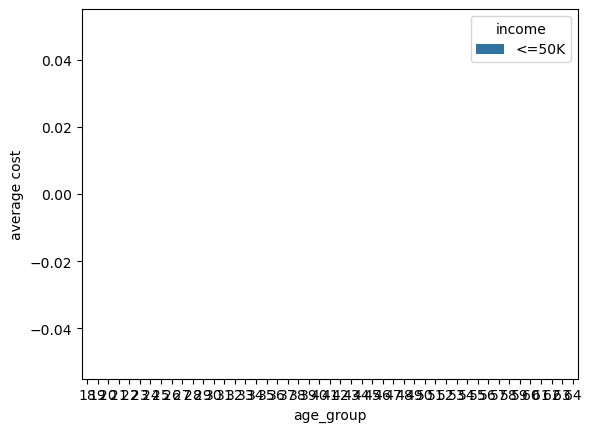

In [23]:
sns.barplot(x = 'age_group', y = 'average cost', data = finaldf1, hue = 'income')

### Research Question 2: Does the age group correlate with healthcare costs in a set of data collected from several regions in the US?

In [80]:
med_clean2 = medcost.drop(['sex', 'bmi','children', 'smoker'], axis = 1)
med_clean2

,age,region,charges
0,19,southwest,16884.92400
1,18,southeast,1725.55230
2,28,southeast,4449.46200
3,33,northwest,21984.47061
4,32,northwest,3866.85520
...,...,...,...
1333,50,northwest,10600.54830
1334,18,northeast,2205.98080
1335,18,southeast,1629.83350
1336,21,southwest,2007.94500


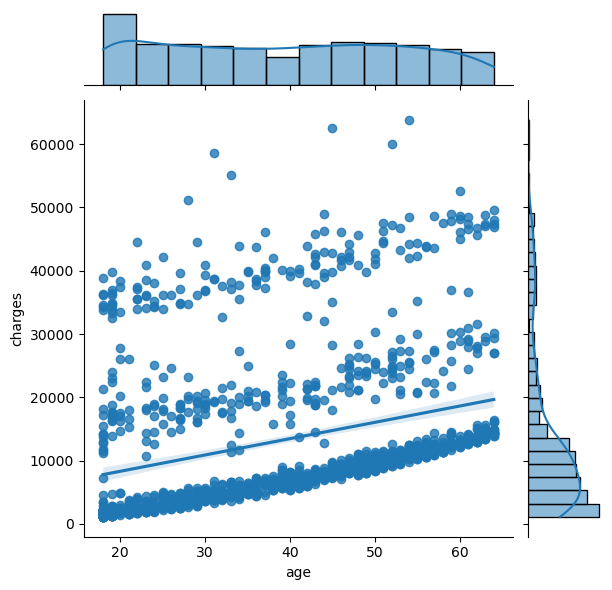

In [88]:
sns.jointplot(x='age', y='charges', data=med_clean2, kind='reg')